In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
 
import tensorflow as tf
import random as rn
from tensorflow import keras

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

# Python script for confusion matrix creation.
import itertools 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
model = Sequential()
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING, weights = RESNET50_WEIGHTS, input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS)))
model.add(BatchNormalization())
model.add(Dense(256, activation= DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(128, activation= DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(64, activation= DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(NUM_CLASSES, activation = OUTPUT_DENSE_LAYER_ACTIVATION))
model.layers[0].trainable = False

94773248/94765736 [==============================] - 1s 0us/step


In [2]:
resnet50 = ResNet50(include_top = False, pooling ='avg', weights ='imagenet', input_shape=(224,224,3))

94773248/94765736 [==============================] - 1s 0us/step


In [3]:
# Freeze the layers except the last 4 layers
for layer in resnet50.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in resnet50.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb362915c18> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7fb2cfe09048> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb2cfe09438> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb2cfe096a0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fb2cf5bed68> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7fb2cf5be390> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb2c6b15e80> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb2c6b212b0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb2c6b47e10> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fb2c6b4dcf8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb2c6b4d4a8> False
<tensorflow.python.keras.laye

In [7]:
model = Sequential()
model.add(resnet50)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 25,696,138
Trainable params: 2,112,522
Non-trainable params: 23,583,616
_________________________________________________________________


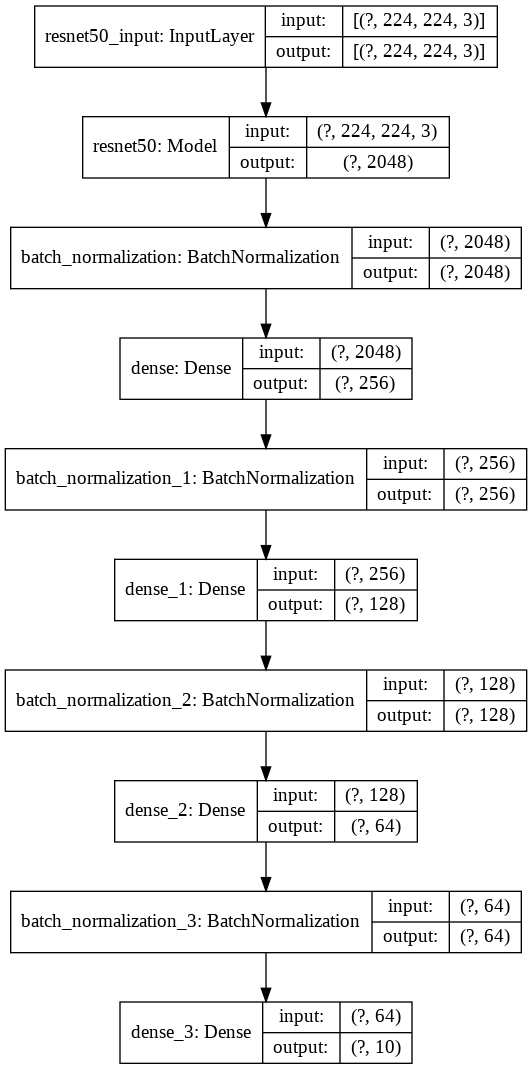

In [0]:
keras.utils.plot_model(model, "model_architecture.png", show_shapes=True)

In [0]:
#History = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
#                    epochs=NUM_EPOCHS,
#                    validation_data = (x_test, y_test),
#                    steps_per_epoch=x_train.shape[0] // BATCH_SIZE,
#                    validation_steps=x.test.shape[0] // BATCH_SIZE,
#                    verbose=1)
History = model.fit(x_train, y_train, epochs=NUM_EPOCHS, batch_size= BATCH_SIZE, validation_data = (x_test,y_test))

Epoch 1/50
35/35 [==============================] - 347s 10s/step - loss: 1.4406 - accuracy: 0.5360 - val_loss: 2.4731 - val_accuracy: 0.0940
Epoch 2/50
35/35 [==============================] - 349s 10s/step - loss: 0.7506 - accuracy: 0.7580 - val_loss: 2.4679 - val_accuracy: 0.1073
Epoch 3/50
35/35 [==============================] - 350s 10s/step - loss: 0.5509 - accuracy: 0.8240 - val_loss: 2.5854 - val_accuracy: 0.1380
Epoch 4/50
35/35 [==============================] - 351s 10s/step - loss: 0.4238 - accuracy: 0.8631 - val_loss: 2.7449 - val_accuracy: 0.1800
Epoch 5/50
21/35 [=================>............] - ETA: 1:34 - loss: 0.3346 - accuracy: 0.9000